[<- Anterior](linearregression_multiple.ipynb) | [Próximo ->](lasso.ipynb)

# Regressão Polinomial

Um modelo de regressão polinomial é um modelo de regressão que utiliza uma regressão polinomial para realizar previsões. O uso desse modelo assume que a relação entre targets e features pode ser aproximado de uma curva cuja acentuação é deterinada por um certo grau, dessa forma, quanto maior a curva que descreve a relação entre features e targets maior é o grau dessa curva.

**O que será abordado**
- Imports
- Dados de teste
- Features Polinomiais
- Criação do Modelo
- Treinamento do modelo
- Realizando Previsões com o modelo

> AVISO: Temas relacionados à divisão dos dados não serão aprofundados nesse documento, porém, explicações sobre esse processo podem ser encontradas na pasta [Validacao](../Validacao/README.md)

# Imports

In [7]:
# Import da biblioteca numpy -> Utilizada para criar conjuntos de dados de teste
import numpy as np

# Import da biblioteca matplotlib -> Utilizada para criar visualizações durante os testes
import matplotlib.pyplot as plt

# Import da função train_test_split
from sklearn.model_selection import train_test_split

# Import da Classe LinearRegression -> Utilizada para criar o modelo de regressão linear
from sklearn.linear_model import LinearRegression

# Import da Classe PolynomialFeatures -> Utilizada no desenvolvimento de uma regressão Polinomial
from sklearn.preprocessing import PolynomialFeatures

# Dados de teste

Nessa seção será desenvolvido um código com numpy que visa criar um conjunto de dados que possa ser usado para o teste de um modelo de Regressão Polinomial.

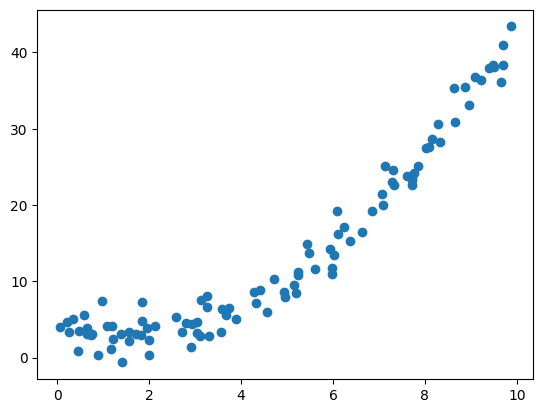

In [8]:
# Define uma seed para a criação de valores aleátorios -> Garante que os dados gerados serão os mesmos e todas as execuções, possibilitando analises reprodutiveis
np.random.seed(42)

# Criação do conjunto de features
x = np.random.rand(100, 1) *10

# Criação do conjunto de targets
y = 0.5 * x**2 - x + 3 + np.random.randn(100, 1) * 2

# Plot dos dados gerados -> Exibe um gráfico com cada par de entrada e saída
plt.scatter(x, y)
plt.show()

**Explicação dos dados:**
- **x** = A função `np.random.rand(100, 1)` cria uma matriz de 100 linhas e uma coluna com valores de 0 a 1. Multiplicar os valores por 10 implica que esses números são distribuídos de 0 a 10.

- **y** = a expressão `0.5 * x**2` faz com que a relação entre x e y seja polinomial, isso é, é possivel observar uma curva na ditribuição dos dados. Já a expressão `- x + 3 + np.random.randn(100, 1) * 2` faz com que um ruido seja adicionado aos dados, o que é comum em casos reais.

Note que, os pontos formados pelo par (x, y) apresentam uma curva leve. Esse é um caso no qual podemos utilizar uma regressão polinomial.

# Features Polinomiais

A criação de um modelo de regressão Polinomial envolve o uso de duas classes em cojunto, sendo essas **LinearRegression** e **PolynomialFeatures**, sendo que, a classe **PolynomialFeatures** desempenha um papel fundamental no pré-processamento de dados de uma Regressão Polinomial.

Em principio, a classe **LinearRegression** apenas consegue determinar relações lineares entre as features e targets. Portanto, para fazer com que essa classe possa deterinar relações não lineares (como as curvas observadas em uma relação polinomial) é realizado um pré-processamento com a classe **PolynomialFeatures**.

Essa classe é responsável por criar novas variaveis com potencias dos produtos originais, criando novos dados que podem ser usados para treinar o modelo. Isso significa que, o uso dessa classe envolve transformar os dados em polinomios. Veja abaixo uma representação do processo realizado pela classe **PolynomialFeatures**:

[[x]] -> [[1, x, x²]]

Para utilizar a classe **PolynomialRegression** é necessário criar um objeto dessa classe. Isso é feito através da seguinte syntaxe:

```py
nome_do_objeto = PolynomialFeatures()
```

Após a criação do objeto, ele pode ser usado para criar novas variaveis através do método `.fit_transform()`, que recebe por parametro o conjunto de dados que será usado para gerar os polinomios.

Sobre o **PolynomialFeatures**, ainda é importante destacar que ele pode receber como parametro o elemento degree. Esse parametro indica o grau de relação que deve ser aplicado pelo objeto, o valor padrão para esse parametro é 2, mas pode ser alterado em casos aonde a curva dos dados possui maior inclinação.

Veja um exemplo desse processo abaixo:

In [9]:
# Divide os datasets em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

# Cria o objeto PolynomialFeatures com relação de segundo grau
poly = PolynomialFeatures()

# Aplica o PolynomialFeatures
x_poly = poly.fit_transform(x_train, y_train)

# Exibe os valores originais
print('Valores Originais')
print(x_train)

# Exibe o resultado do PolynomialFeatures
print('Valores Tratados')
print(x_poly)


Valores Originais
[[9.21874235]
 [8.87212743]
 [1.99673782]
 [0.34388521]
 [9.86886937]
 [1.8340451 ]
 [1.22038235]
 [5.22732829]
 [7.08072578]
 [0.05522117]
 [9.69909852]
 [5.20068021]
 [3.25183322]
 [5.92414569]
 [5.61277198]
 [1.5599452 ]
 [1.40924225]
 [5.42696083]
 [8.08397348]
 [3.04242243]
 [1.84854456]
 [9.65632033]
 [8.66176146]
 [4.93795596]
 [5.14234438]
 [2.9122914 ]
 [6.23298127]
 [7.85175961]
 [8.28737509]
 [2.12339111]
 [4.56069984]
 [5.98658484]
 [5.24756432]
 [6.84233027]
 [6.01115012]
 [3.58465729]
 [0.58083612]
 [2.8093451 ]
 [3.04613769]
 [4.72214925]
 [0.88492502]
 [1.07891427]
 [5.97899979]
 [9.09320402]
 [9.69584628]
 [8.02196981]
 [3.11711076]
 [0.74550644]
 [2.71349032]
 [4.27541018]
 [1.1586906 ]
 [4.9517691 ]
 [0.45227289]
 [5.46710279]
 [0.25419127]
 [1.95982862]
 [7.29007168]
 [0.65051593]
 [7.7096718 ]
 [3.25330331]
 [3.56753327]
 [3.10982322]
 [0.97672114]
 [0.46450413]
 [9.50714306]
 [9.39498942]
 [1.39493861]
 [7.31993942]
 [3.66361843]
 [6.37557471]
 [

Perceba que, após aplicar o método `.fit_transform()`, o resultado é que, cada dado x é transformado em um array com os elementos [1, x, x²]. 

Para esse caso especifico, o grau de relação entre as variaeis é 2, portanto o maior valor do array resultado da aplicação desse método é x². Caso o numero 3 fosse fornecido como valor para o parametro degree (`nome_da_funcao = PolynomialFeatures(degree = 3)`) o resultado para cada valor x seria [1, x, x², x³]

# Criação do Modelo

A criação de um modelo de regressão polinomial na bilbioteca scikit-learn é feita com a classe `LinearRegression()`. Isso pode ser feito através da sintáxe:

```py
nome_do_modelo = LinearRegression()
```

Veja no exemplo abaixo:

In [10]:
# Criação do modelo
poly_lr = LinearRegression()

A execução do código acima cria um modelo de regressão polinomial chamado poly_lr.

# Treinamento do modelo

O treinamento do modelo é realizado com o método `.fit()` do modelo criado.

Esse método necessita de dois parâmetros, sendo eles:

- x -> Features de treino **transformadas em polinomio**.
- y - > Targets de treino

Ainda é importante ressaltar que, conforme foi abordado no documento [train_test.ipynb](../../Validacao/train_test_split.ipynb), pode ser necessário dividir o conjunto de dados utilizado em treino e teste, sendo que, **APENAS** os dados de treino são usados durante o processo de treinamento do modelo.

Além disso, por se tratar de um modelo polinomial, é necessário que o conjunto de features ja esteja ajustado na forma de um polinomio. Isso foi realizado na sessão [PolynomialFeatures](#polynomial-features) desse documento.

Veja no exemplo abaixo:

In [11]:
# Treinamento do modelo
poly_lr.fit(x_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Após a aplicação do método `.fit()` com os conjuntos de treino o modelo esta treinado, podendo assim ser utilizado para realizar previsões com base em novos conjuntos de dados.

# Realizando Previsões com o modelo

Uma vez que um modelo de Regressão Polinomial tenha sido treinado, é possível usa-lo para realizar previsões à partir de novos dados. 

Esse processo é realizado com o método `.predict()` do modelo, esse método precisa de um único parâmetro:

x -> Conjunto de dados com os quais se deseja realizar previsões. Esses dados devem ser fornecidos na forma de um Array , que deve conter arrays com as features necessárias para realizar as previsões. Pode também ser fornecido da forma de um Dataframe com os dados necessários.

O retorno dessa função é um Array, que contém um conjunto de Arrays com os targets previstos. Ou, no caso de um Dataframe ser utilizado como parâmetro de entrada, a saída é um único array com os dados previstos.

Veja um exemplo abaixo:

Dados de Entrada
[[1.00000000e+00 6.35583503e-01 4.03966389e-01]
 [1.00000000e+00 8.94827350e+00 8.00715987e+01]
 [1.00000000e+00 7.72244769e+00 5.96361984e+01]
 [1.00000000e+00 6.62522284e+00 4.38935777e+01]
 [1.00000000e+00 2.58779982e+00 6.69670789e+00]
 [1.00000000e+00 4.40152494e+00 1.93734218e+01]
 [1.00000000e+00 2.92144649e+00 8.53484957e+00]
 [1.00000000e+00 8.63103426e+00 7.44947524e+01]
 [1.00000000e+00 2.05844943e-01 4.23721405e-02]
 [1.00000000e+00 3.74540119e+00 1.40280301e+01]
 [1.00000000e+00 4.31945019e+00 1.86576499e+01]
 [1.00000000e+00 6.07544852e+00 3.69110747e+01]
 [1.00000000e+00 8.15461428e+00 6.64977341e+01]
 [1.00000000e+00 9.48885537e+00 9.00383763e+01]
 [1.00000000e+00 1.19594246e+00 1.43027837e+00]
 [1.00000000e+00 1.56018640e+00 2.43418162e+00]
 [1.00000000e+00 7.71270347e+00 5.94857948e+01]
 [1.00000000e+00 7.40446517e-01 5.48261045e-01]
 [1.00000000e+00 8.32442641e+00 6.92960750e+01]
 [1.00000000e+00 1.70524124e+00 2.90784768e+00]]
--------------------
D

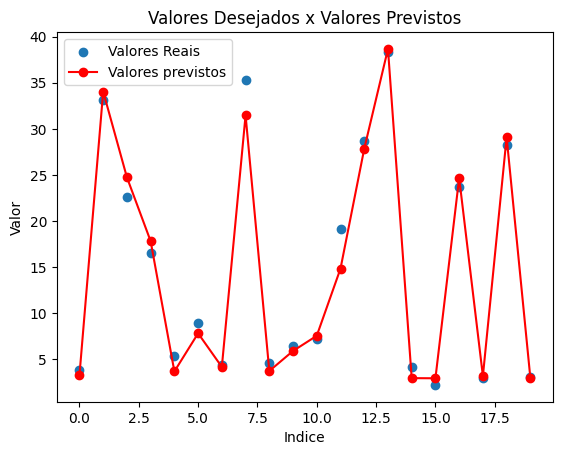

In [15]:

# Exibição dos vaores de entrada
print('Dados de Entrada')
print(poly.fit_transform(x_test))

print('-'*20) # Adiciona um separador entre as entradas e saídas -> Utilizada nessa parte para melhorar a representação visual

# Previsão dos dados de teste
pred = poly_lr.predict(poly.fit_transform(x_test))

# Previsão dos dados de Teste
print('Dados Previstos')
print(pred)

# Visualização dos dados previstos e saídas esperadas

# Criação de um array para unir os dados previstos e dados esperados
data = [range(len(pred)), y_test, pred]

# Criação da visualização dos dados previstos
plt.scatter(data[0], data[1], label = 'Valores Reais')
plt.plot(data[0], data[2], marker = 'o', color = 'red', label = 'Valores previstos')
plt.title('Valores Desejados x Valores Previstos')
plt.xlabel('Indice')
plt.ylabel('Valor')
plt.legend()
plt.show()

Dessa forma, percebe-se que para realizar uma previsão é necessário que os dados estejam ordenados na forma de um Array com a seguinte estrutura.

features = [[1, x1, x1²], [1, x2, x2²], ..., [1, xn, xn²]] ou um dataframe cujas colunas sejam as necessárias para as previsões.

Da mesma forma, após aplicar o método `.predict()` o resultado é um Array de mesma estrutura, porém, contendo os valores previstos (isso é, o valor de y para a respectiva entrada x, no array fornecido). Sendo assim:

`*nome_do_modelo*.predict(*features*)`, retorna: [[y1], [y2], ..., [yn]]   

onde:   

y1 é a previsão feita com a entrada 1, x1, x1² - y2 é a previsão feita com a entrada 1, x2, x2² - etc...

> NOTA: Assim como uma regressão linear, um modelo de regressão polinomial pode ser simples ou multiplo dependendo da quantidade de features diferentes. Quando lidamos com uma regressão polinomial multipla podem haver features polinomiais e features lineares sendo que nesses casos devemos aplicar o Polinomialeaturres apenas as features com relação polinomial e o treino do modelo é realizado fornecendo um unico array que contém tanto as features lineares quanto as polinomiais.

#
[<- Anterior](linearregression_multiple.ipynb) | [Próximo ->](lasso.ipynb)